In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 设置背景颜色
sns.set(color_codes=True)

# plt.style.use('classic')
# sns.set(rc={'figure.figsize':(3,3)})

%matplotlib inline
%config InlineBackend.figure_format = 'retina' # 图片高清显示

In [47]:
filepath = '/Users/joey/Documents/PycharmProjects/mywork/regressionalgorithm/creditcard.csv'
data = pd.read_csv(filepath)
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


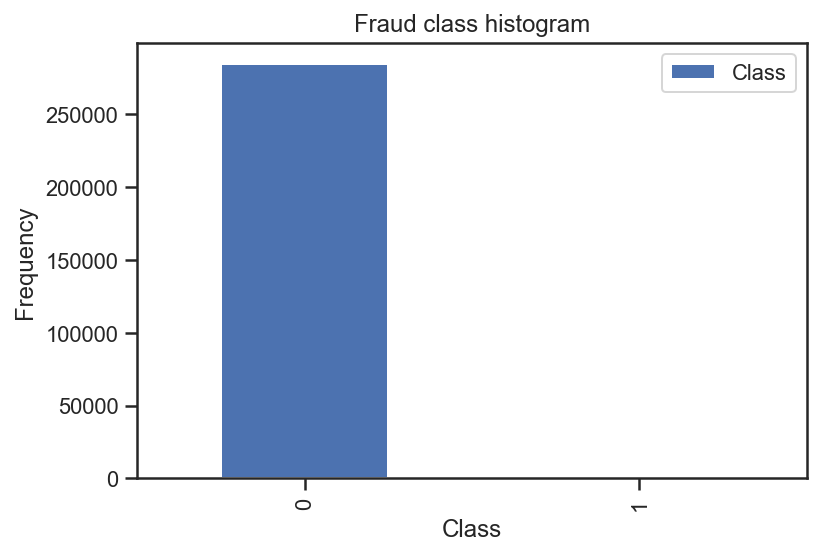

In [48]:
count_classes = pd.value_counts(data['Class'],sort=True).sort_index()
with sns.axes_style('ticks'):
    count_classes.plot(kind='bar')
    plt.title('Fraud class histogram')
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.legend()

In [49]:
# 过采样 下采样，对数据样本不均衡有效。下采样：把样本数做为一样比例。过采样：生成新数据

# 去均值和方差归一化。且是针对每一个特征维度来做的，而不是针对样本。然后直接用于转换测试集数据。
# 去除均值和方差缩放：通过(X-X_mean)/std计算每个属性(每列)，进而使所有数据聚集在0附近，方差为1.

from sklearn.preprocessing import StandardScaler
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1)) # -1,反转,[2,3],--[3,2] -1是指未设定行数，程序随机分配
data = data.drop(['Time','Amount'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [50]:
# 下采样
X = data.iloc[:,data.columns != 'Class']
y = data.iloc[:,data.columns == 'Class']


In [51]:
# Number of data points in the minority class
number_records_fraud = len(data[data.Class == 1])
number_records_fraud

492

In [52]:
fraud_indices = np.array(data[data.Class == 1].index)
fraud_indices

array([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
         6338,   6427,   6446,   6472,   6529,   6609,   6641,   6717,
         6719,   6734,   6774,   6820,   6870,   6882,   6899,   6903,
         6971,   8296,   8312,   8335,   8615,   8617,   8842,   8845,
         8972,   9035,   9179,   9252,   9487,   9509,  10204,  10484,
        10497,  10498,  10568,  10630,  10690,  10801,  10891,  10897,
        11343,  11710,  11841,  11880,  12070,  12108,  12261,  12369,
        14104,  14170,  14197,  14211,  14338,  15166,  15204,  15225,
        15451,  15476,  15506,  15539,  15566,  15736,  15751,  15781,
        15810,  16415,  16780,  16863,  17317,  17366,  17407,  17453,
        17480,  18466,  18472,  18773,  18809,  20198,  23308,  23422,
        26802,  27362,  27627,  27738,  27749,  29687,  30100,  30314,
        30384,  30398,  30442,  30473,  30496,  31002,  33276,  39183,
        40085,  40525,  41395,  41569,  41943,  42007,  42009,  42473,
      

In [53]:
# Picking the indices of the normal classes
norm_indices = data[data.Class == 0].index
norm_indices

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            284797, 284798, 284799, 284800, 284801, 284802, 284803, 284804,
            284805, 284806],
           dtype='int64', length=284315)

In [54]:
# Out of the indices we picked,randomly select 'x' number(number_records_fraud)
# 按照size提取样本值
random_normal_indices = np.random.choice(norm_indices,number_records_fraud,replace=False)
random_normal_indices

array([273813,  16911, 236501,   3105, 134943,  12032,   2362, 145109,
       196564,  38604, 155478,  93905,  35386, 119355, 280578, 115204,
         8070,  23950, 186248,  12322, 266201,  79953, 160267, 173247,
        29964,  18334, 134114,  20012,  80936, 105766, 182098, 241159,
        69085,  14571, 264993, 130163, 229663,  71757, 213215,  24450,
         9345, 279951,   8134, 234318, 124139, 126232, 266477, 284510,
       175086,  81424,  42226, 249375, 144393, 212633, 108904, 121176,
       205742,  56441, 276961, 282442, 239088,   7813,  98645, 272148,
        21290, 210233, 217468, 260541,  58716, 196955, 141535, 253043,
       226552, 119415,  44352,  22679,  29165, 220873, 241079, 131145,
        85885, 138104, 212148, 113250,  16761,  38675, 115143, 169261,
       102085, 194648, 190708, 250714, 249588, 136237, 232543, 205302,
        39793,  24471, 137130, 109905, 116670,  49208,  85652, 198207,
        52227, 176728,  69518,  64799,  21392, 144642, 241040,  41325,
      

In [55]:
# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
under_sample_indices

array([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
         6338,   6427,   6446,   6472,   6529,   6609,   6641,   6717,
         6719,   6734,   6774,   6820,   6870,   6882,   6899,   6903,
         6971,   8296,   8312,   8335,   8615,   8617,   8842,   8845,
         8972,   9035,   9179,   9252,   9487,   9509,  10204,  10484,
        10497,  10498,  10568,  10630,  10690,  10801,  10891,  10897,
        11343,  11710,  11841,  11880,  12070,  12108,  12261,  12369,
        14104,  14170,  14197,  14211,  14338,  15166,  15204,  15225,
        15451,  15476,  15506,  15539,  15566,  15736,  15751,  15781,
        15810,  16415,  16780,  16863,  17317,  17366,  17407,  17453,
        17480,  18466,  18472,  18773,  18809,  20198,  23308,  23422,
        26802,  27362,  27627,  27738,  27749,  29687,  30100,  30314,
        30384,  30398,  30442,  30473,  30496,  31002,  33276,  39183,
        40085,  40525,  41395,  41569,  41943,  42007,  42009,  42473,
      

In [56]:
# Under sample dataset 下采样
under_sample_data = data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.iloc[:,under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:,under_sample_data.columns == 'Class']

In [57]:
# Showing ratio
print('Precentage of normal transactions:',len(under_sample_data[under_sample_data.Class == 0]) / len(under_sample_data))
print('Precentage of normal transactions:',len(under_sample_data[under_sample_data.Class == 1]) / len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Precentage of normal transactions: 0.5
Precentage of normal transactions: 0.5
Total number of transactions in resampled data:  984


In [58]:
# 交叉验证
from sklearn.model_selection import train_test_split
# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # random_state种子 每次分的数据都一样

print('Number transactions train dataset:', len(X_train))
print('Number transactions test dataset:', len(X_test))
print('Total number of transactions:', len(X_train)+len(X_test))

Number transactions train dataset: 199364
Number transactions test dataset: 85443
Total number of transactions: 284807


In [59]:
# Undersampled dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample,
                                                                                                    y_undersample,
                                                                                                    test_size=0.3,
                                                                                                    random_state=0)
print("Number transactions train dataset: ", len(X_train_undersample))
print("Number transactions test dataset: ", len(X_test_undersample))
print("Total number of transactions: ", len(X_train_undersample)+len(X_test_undersample))


Number transactions train dataset:  688
Number transactions test dataset:  296
Total number of transactions:  984


#### Recall = TP/(TP+FN)
#### Recall 召回率，查全率
#### 是模型的精度衡量标准，普通精度不严谨。
#### 某类预测结果正确数 除于 某类真实结果数
![image]('/Users/joey/Documents/PycharmProjects/mywork/regressionalgorithm/1.jpg')


#### 正则化惩罚项
https://blog.csdn.net/qq_41686130/article/details/93680344?utm_medium=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-2.nonecase&depth_1-utm_source=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-2.nonecase
https://blog.csdn.net/qq_41686130/article/details/93680344?utm_medium=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-2.nonecase&depth_1-utm_source=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-2.nonecase
##### L1 L2正则化
L1: LOSS + |w|
L2: LOSS + 1/2 * w^2

In [60]:
# Recall
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score # KFold 做几倍的交叉验证，切分训练集。 cross_val_score 交叉验证评估结果
from sklearn.metrics import confusion_matrix, recall_score, classification_report # 混淆矩阵 混淆矩阵（confusion matrix）刻画一个分类器的分类准确程度。“混淆”一词也形象地表达了分类器面对多个分类时可能造成的混淆。https://blog.csdn.net/songchaomail/article/details/43834741?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522159333306319724835815793%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=159333306319724835815793&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~top_click~default-1-43834741.ecpm_v1_rank_ctr_v3&utm_term=%E6%B7%B7%E6%B7%86%E7%9F%A9%E9%98%B5

In [61]:
def printing_KFold_score(x_train_data,y_train_data):
    global results_table
    fold = KFold(5, shuffle=False) # shuffle 洗牌

    # 正则化惩罚参数
    c_param_range = [0.01, 0.1, 1, 10, 100]
   
    j = 0
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('C parameter:  ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
        for iteration, indices in enumerate(fold.split(y_train_data), start=1):
            # Call the logistic regression model with a certain C parameter
            lr = LogisticRegression(C=c_param, penalty='l2')  # C 惩罚力度， penalty 惩罚方法

            # Use the training data to fit the model. In this case,we use the portion of the fold to train the model
            # with indices[0]. We then predict on the portion assigned as the 'test cross validation' with indices[1]
            lr.fit(x_train_data.iloc[indices[0], :], y_train_data.iloc[indices[0],:].values.ravel())

            # Predict values using the test indices in the training data
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)

            # Calulate the recall score and append it to a list for recall scores representing the current c_parameter
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values, y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration', iteration, ':recall score=', recall_acc)


        # The mean value of those recall scores is the metric we want to save and get hold of.
        results_table = pd.DataFrame(columns= ['C_parameter', 'Mean recall score'])
        results_table['C_parameter'] = c_param_range
        results_table.iloc[j, 1] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')

    best_c = results_table.loc[results_table['Mean recall score'].astype('float').idxmx()]['C_parameter']
    # Finally, we can check which C parameter is the best amongst the chosen.
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*********************************************************************************')

    return best_c

best_c = printing_KFold_score(X_train,y_train)

-------------------------------------------
C parameter:   0.01
-------------------------------------------

Iteration 1 :recall score= 0.5373134328358209
Iteration 2 :recall score= 0.6164383561643836
Iteration 3 :recall score= 0.6666666666666666
Iteration 4 :recall score= 0.6
Iteration 5 :recall score= 0.5

Mean recall score  0.5840836911333742

-------------------------------------------
C parameter:   0.1
-------------------------------------------

Iteration 1 :recall score= 0.5522388059701493
Iteration 2 :recall score= 0.6164383561643836
Iteration 3 :recall score= 0.7166666666666667
Iteration 4 :recall score= 0.6153846153846154
Iteration 5 :recall score= 0.5625

Mean recall score  0.612645688837163

-------------------------------------------
C parameter:   1
-------------------------------------------

Iteration 1 :recall score= 0.5522388059701493
Iteration 2 :recall score= 0.6164383561643836
Iteration 3 :recall score= 0.7333333333333333
Iteration 4 :recall score= 0.6153846153846

In [62]:
# This function prints and plots the confusion matrix.
import itertools
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap) # interpolation is style 将数据映射到图表中
    plt.title(title)
    plt.colorbar() # label
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j] ,horizontalalignment= 'center', color='white' if cm[i, j] > thresh else 'black')
    sns.set(color_codes=True,style='white')
    # plt.style.use('classic')
    plt.tight_layout()
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

Recall metric in the testing dataset:  0.9387755102040817


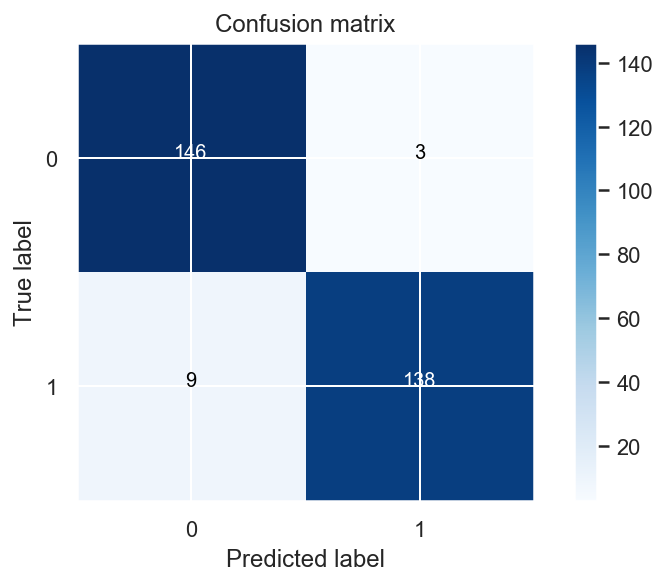

In [63]:
lr = LogisticRegression(C= best_c, penalty='l2',max_iter=30000)
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
np.set_printoptions(precision=2) # 设置打印精度
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix

class_names = [0,1]
# with sns.axes_style('white'):
plt.figure()
plot_confusion_matrix(cm=cnf_matrix, classes=class_names)

/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Recall metric in the testing dataset:  0.9319727891156463


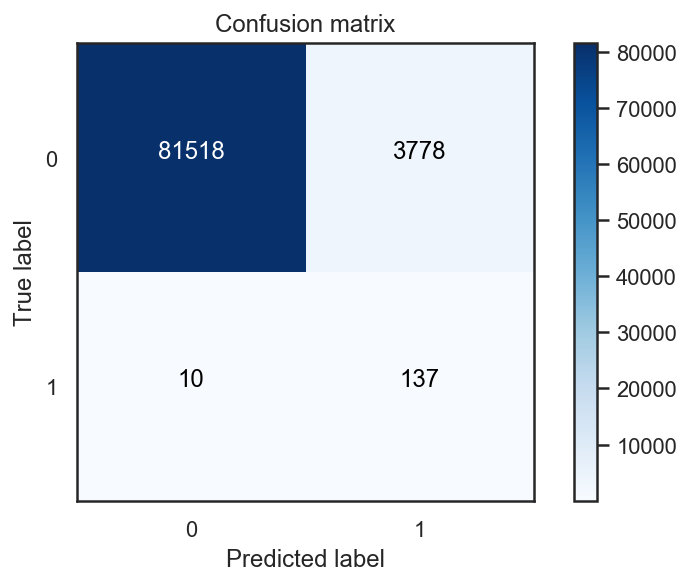

In [64]:
# 预测源数据
lr = LogisticRegression(C = best_c, penalty = 'l2')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test.values) # 源数据

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_undersample) # 源数据
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')

Recall metric in the testing dataset:  0.9931972789115646
Recall metric in the testing dataset:  0.9523809523809523
Recall metric in the testing dataset:  0.9251700680272109
Recall metric in the testing dataset:  0.9047619047619048
Recall metric in the testing dataset:  0.8707482993197279
Recall metric in the testing dataset:  0.8503401360544217
Recall metric in the testing dataset:  0.8503401360544217
Recall metric in the testing dataset:  0.8095238095238095
Recall metric in the testing dataset:  0.7755102040816326


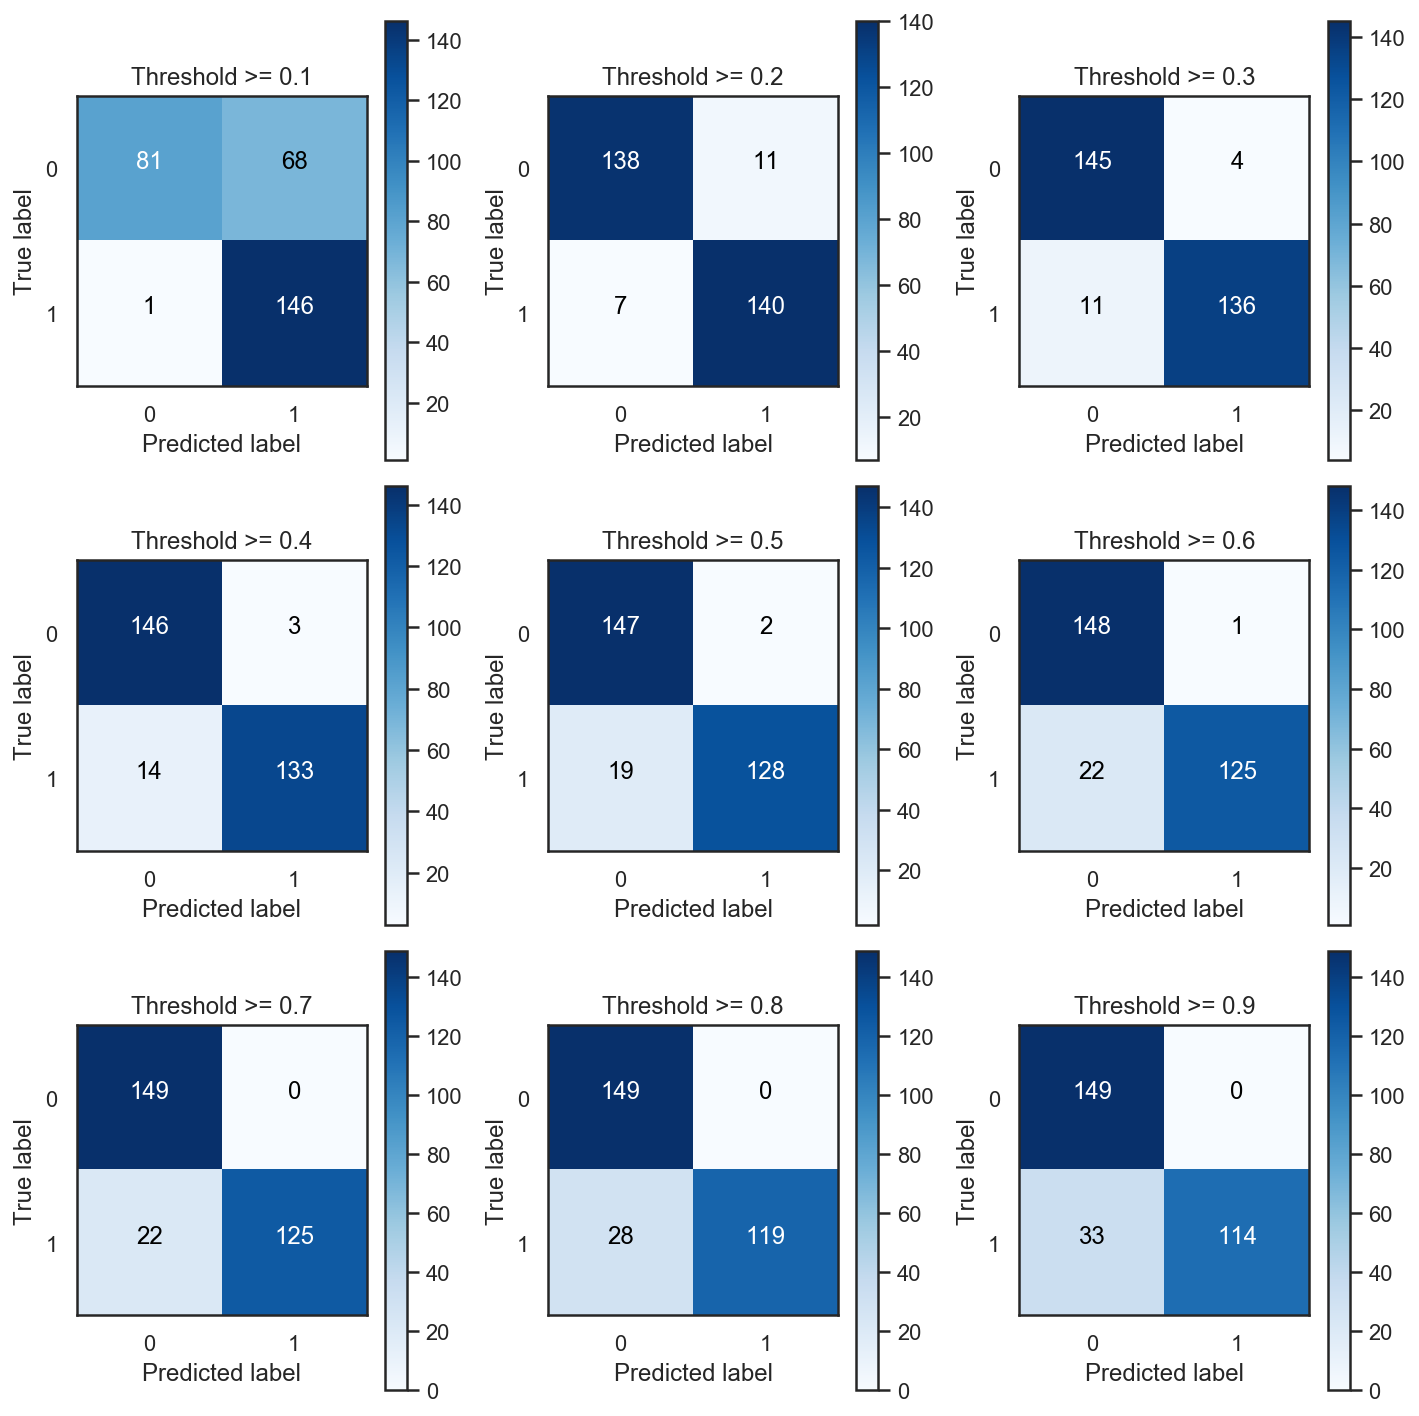

In [74]:
# 改变sigmoid的类别判断标准 [0,1]  改变 threshhold
# https://blog.csdn.net/saltriver/article/details/57531963
lr = LogisticRegression(C = 0.01, penalty = 'l2')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values) # 预测概率值  每个值的概率值
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

plt.figure(figsize=(10, 10))
j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i

    plt.subplot(3,3,j)
    j += 1

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test_undersample.values.ravel(), y_test_predictions_high_recall)
    # cnf_matrix = confusion_matrix(y_test_undersample, y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s' % i)

# 过采样
# SMOTE算法
![image]('/Users/joey/Documents/PycharmProjects/mywork/regressionalgorithm/2.jpg')


In [75]:
# over_sampling 过采样
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


In [78]:
credit_cards = pd.read_csv(filepath)
columns = credit_cards.columns
# The labels are in the last column ('Class'). Simply remove it to obtain features columns
features_columns = columns.delete(len(columns)-1)

features = credit_cards[features_columns]
labels = credit_cards['Class']

In [79]:
features_train, features_test, labels_train, labels_test = train_test_split(features,
                                                                            labels,
                                                                            test_size=0.2,
                                                                            random_state=0)

In [80]:
oversampler = SMOTE(random_state=0)
os_features, os_labels = oversampler.fit_sample(features_train, labels_train)

In [82]:
len(os_labels[os_labels==1]), len(os_labels[os_labels==0])

(227454, 227454)

In [88]:
os_features = pd.DataFrame(os_features)
os_labels = pd.DataFrame(os_labels)
best_c = printing_KFold_score(os_features, os_labels)

-------------------------------------------
C parameter:   0.01
-------------------------------------------

Iteration 1 :recall score= 0.8838709677419355
Iteration 2 :recall score= 0.875
Iteration 3 :recall score= 0.9636162443288702
Iteration 4 :recall score= 0.9545069849748848
Iteration 5 :recall score= 0.9549246545982129

Mean recall score  0.9263837703287807

-------------------------------------------
C parameter:   0.1
-------------------------------------------

Iteration 1 :recall score= 0.8903225806451613
Iteration 2 :recall score= 0.875
Iteration 3 :recall score= 0.9441850171517097
Iteration 4 :recall score= 0.9548367241511964
Iteration 5 :recall score= 0.9557270199272375

Mean recall score  0.9240142683750608

-------------------------------------------
C parameter:   1
-------------------------------------------

Iteration 1 :recall score= 0.8838709677419355
Iteration 2 :recall score= 0.875
Iteration 3 :recall score= 0.9441850171517097
Iteration 4 :recall score= 0.955045558

/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_m

Recall metric in the testing dataset:  0.900990099009901


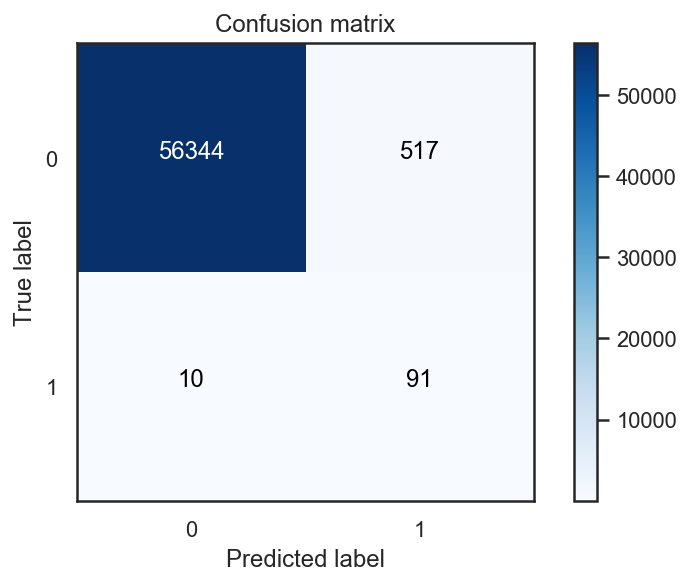

In [90]:
lr = LogisticRegression(C = best_c, penalty = 'l1', solver='liblinear')
lr.fit(os_features, os_labels.values.ravel())
y_pred = lr.predict(features_test.values)

cnf_matrix = confusion_matrix(labels_test,y_pred)
np.set_printoptions(precision=2)
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')

/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Recall metric in the testing dataset:  0.8910891089108911


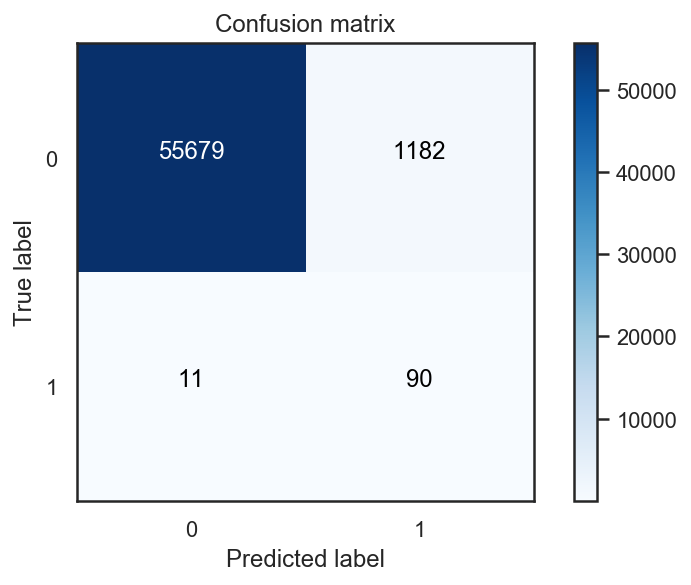

In [91]:
lr = LogisticRegression(C = best_c, penalty = 'l2')
lr.fit(os_features,os_labels.values.ravel())
y_pred = lr.predict(features_test.values)

cnf_matrix = confusion_matrix(labels_test,y_pred)
np.set_printoptions(precision=2)
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')

